In [ ]:
import numpy as np

extendable_class = np.load("/content/extendableMappings.npy")
nonextendable_class = np.load("/content/nonExtendableMappings.npy")
goodclassifier_class = np.load("/content/trueClassifiersGoodMORE.npy")

# Create a new list to store reshaped matrices
reshaped_matrices = []

# Loop over each element in goodclassifier_class and reshape
for i in range(len(goodclassifier_class)):
    reshaped_matrix = goodclassifier_class[i].reshape((4, 4))
    reshaped_matrices.append(reshaped_matrix)

# Convert the list of reshaped matrices to a NumPy array
reshaped_goodclassifier_class = np.array(reshaped_matrices)
reshaped_goodclassifier_class = reshaped_goodclassifier_class.astype(int)

In [ ]:
print(len(reshaped_goodclassifier_class))

1110


In [ ]:
import numpy as np

absdict = 0
# Checking the absolute value condition
for matrix_index in range(len(reshaped_goodclassifier_class)):  # Iterate over matrices
    matrix = -reshaped_goodclassifier_class[matrix_index]  # Get the matrix at the current index
    all_rows_satisfy_condition = True  # Flag to track if all rows satisfy the condition
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = np.abs(row[3] - row[2])  # Calculate differences for one set of adjacent elements
        diff2 = np.abs(row[1] - row[0])  # Calculate differences for the next set of adjacent elements
        if not np.all(diff1 <= diff2):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            break  # No need to check other rows if one row fails
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = row[3] + row[2]  # Calculate differences for one set of adjacent elements
        diff2 = row[1] - 3*(row[0])  # Calculate differences for the next set of adjacent elements
        diff3 = -2*(row[0])
        if not np.all(diff1 <= diff2 <= diff3):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            print(matrix, row[i])
            #break  # No need to check other rows if one row fails
    if all_rows_satisfy_condition:
        print(matrix)  # Print the matrix if all rows satisfy the condition
        absdict += 1
print(absdict)

Streaming output truncated to the last 5000 lines.
 [ 0 -3 -4  1]
 [ 0 12 13  0]]
failed the abs conditions in row 2
matrix [[ 0  4  4  0]
 [ 0  5  4  1]
 [ 0 -3 -4  1]
 [ 0 12 13  0]]
failed the second condition in row 0
matrix [[-2  2  4 -3]
 [ 8  1  3  6]
 [ 3 -1  0  2]
 [ 4  3  7  1]]
failed the abs conditions in row 0
matrix [[-2  2  4 -3]
 [ 8  1  3  6]
 [ 3 -1  0  2]
 [ 4  3  7  1]]
failed the second condition in row 0
matrix [[-2  2  4 -3]
 [ 8  1  3  6]
 [ 3 -1  0  2]
 [ 4  3  7  1]]
failed the abs conditions in row 0
matrix [[-2  2  4 -3]
 [ 8  1  3  6]
 [ 3 -1  0  2]
 [ 4  3  7  1]]
failed the second condition in row 0
matrix [[ 5  8 18 -5]
 [-2  1 -2  2]
 [ 2 -1  2 -2]
 [ 2 11 14 -2]]
failed the abs conditions in row 0
matrix [[ 5  8 18 -5]
 [-2  1 -2  2]
 [ 2 -1  2 -2]
 [ 2 11 14 -2]]
failed the second condition in row 0
matrix [[ 0  3  4  0]
 [ 6  0  2  4]
 [ 1  0  3 -1]
 [ 5  3  3  5]]
failed the abs conditions in row 0
matrix [[ 0  3  4  0]
 [ 6  0  2  4]
 [ 1  0  3 -1]

In [ ]:
import numpy as np

absdict1 = 0
# Checking the absolute value condition
for matrix_index in range(len(reshaped_goodclassifier_class)):  # Iterate over matrices
    matrix = -reshaped_goodclassifier_class[matrix_index]  # Get the matrix at the current index
    all_rows_satisfy_condition = True  # Flag to track if all rows satisfy the condition
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = np.abs(row[2:3][0] - row[3:4][0])  # Calculate differences for one set of adjacent elements
        diff2 = np.abs(row[0:1][0] - row[1:2][0])  # Calculate differences for the next set of adjacent elements
        if not np.all(diff1 <= diff2):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            break  # No need to check other rows if one row fails
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = row[3:4][0] + row[2:3][0]  # Calculate differences for one set of adjacent elements
        diff2 = row[0:1][0] - 3*(row[1:2][0])  # Calculate differences for the next set of adjacent elements
        diff3 = -2*(row[1])
        if not np.all(diff1 <= diff2 <= diff3):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            break  # No need to check other rows if one row fails
    if all_rows_satisfy_condition:
        print(matrix)  # Print the matrix if all rows satisfy the condition
        absdict1 += 1
print(absdict1)

0


In [ ]:
import numpy as np

absdict2 = 0
# Checking the absolute value condition
for matrix_index in range(len(reshaped_goodclassifier_class)):  # Iterate over matrices
    matrix = -reshaped_goodclassifier_class[matrix_index]  # Get the matrix at the current index
    all_rows_satisfy_condition = True  # Flag to track if all rows satisfy the condition
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = np.abs(row[1] - row[0])  # Calculate differences for one set of adjacent elements
        diff2 = np.abs(row[3] - row[2])  # Calculate differences for the next set of adjacent elements
        if not np.all(diff1 <= diff2):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            break  # No need to check other rows if one row fails
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = row[1] + row[0]  # Calculate differences for one set of adjacent elements
        # diff1 = row[3:4][0] + row[2:3][0]
        diff2 = row[2] - 3*(row[3])  # Calculate differences for the next set of adjacent elements
        diff3 = -2*(row[3])
        if not np.all(diff1 <= diff2 <= diff3):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            break  # No need to check other rows if one row fails
    if all_rows_satisfy_condition:
        print(matrix)  # Print the matrix if all rows satisfy the condition
        absdict2 += 1
print(absdict2)

0


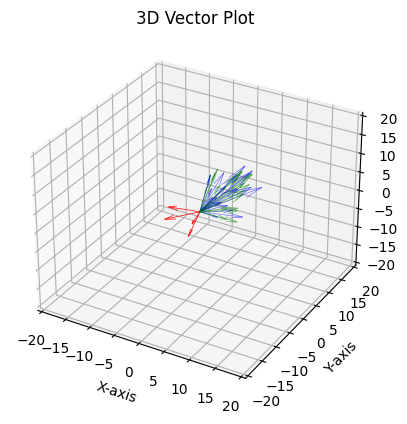

In [ ]:
# This code was created by karim with some editing by luke

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assign colors and labels to each set of vectors
colors = ['r', 'g', 'b', 'y']
labels = ['Good Classifier', 'Extends', "Doesn't Extend", 'Farthest B']

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# PLOT CLASSIFIER
soa = np.array([[0, 0, 0, 0, -4, -4], [0, 0, 0, -7, 1, -2],
                [0, 0, 0, -1, -1, -3], [0, 0, 0, -6, -2, -3]])  # Vectors representing a "Good Classifier"
# Unpack the arrays for plotting
X, Y, Z, U, V, W = zip(*soa)
# Plot each set of vectors using quiver plot
ax.quiver(X, Y, Z, U, V, W, color=colors[0], label=labels[0], linewidth=0.5)


# PLOT EXTENDABLE MAPPINGS
for i in range(5):
  soa1 = extendable_class[i]
  soa1 = soa1[:, :-1] # delete the last column bc we don't use it to graph
  padded = np.hstack((np.zeros((soa1.shape[0], 3)), soa1))
  X, Y, Z, U, V, W = zip(*padded)
  ax.quiver(X, Y, Z, U, V, W, color=colors[1], label=labels[1], linewidth=0.5, alpha=0.5)


# PLOT NONEXTENDABLE MAPPINGS
for i in range(5):
  soa2 = nonextendable_class[i]
  soa2 = soa2[:, :-1] # delete the last column bc we don't use it to graph
  padded = np.hstack((np.zeros((soa2.shape[0], 3)), soa2))
  X, Y, Z, U, V, W = zip(*padded)
  ax.quiver(X, Y, Z, U, V, W, color=colors[2], label=labels[2], linewidth=0.5, alpha=0.5)


# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Add legend to the plot
# ax.legend()

# Set title for the plot
plt.title('3D Vector Plot')

# Show the plot
plt.show()


In [ ]:
# TODO: double check that this calculation acutally checks for coplanar

def are_vectors_coplanar(v1, v2, v3):
    # Calculate scalar triple product
    scalar_triple_product = v1[0] * (v2[1]*v3[2] - v2[2]*v3[1]) - v1[1] * (v2[0]*v3[2] - v2[2]*v3[0]) + v1[2] * (v2[0]*v3[1] - v2[1]*v3[0])

    # Check if the scalar triple product is zero
    if scalar_triple_product == 0:
        return True
    else:
        return False

# Example usage:
v1 = soa[0, 3: ]
v2 = soa[1, 3: ]
v3 = soa[3, 3: ]
result = are_vectors_coplanar(v1, v2, v3)
print("Are the vectors coplanar?", result)
print(v1)
print(v2)
print(v3)


Are the vectors coplanar? False
[ 0 -4 -4]
[-7  1 -2]
[-6 -2 -3]


In [ ]:
# TODO: double check that this calculation acutally checks for colinear

def is_row_collinear(matrix):
    for i, row in enumerate(matrix):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        submatrix = np.delete(submatrix, i, axis=1)  # Exclude the corresponding column
        determinant = np.linalg.det(submatrix)
        if np.isclose(determinant, 0):  # Check if determinant is close to zero
            return True
    return False

# Example usage:
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

result = is_row_collinear(matrix)
print("Is one of the rows collinear with the others?", result)


Is one of the rows collinear with the others? True


In [ ]:
import numpy as np

def row_collinearity_score(matrix):
    min_abs_det = np.inf

    for i in range(4):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        for j in range(4):
            if i != j:
                submatrix_temp = np.delete(submatrix, j, axis=1)  # Exclude the corresponding column
                if submatrix_temp.shape[0] == submatrix_temp.shape[1]:  # Check if it's a square matrix
                    det = np.abs(np.linalg.det(submatrix_temp))
                    min_abs_det = min(min_abs_det, det)

    return min_abs_det

# Example usage:
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

score = row_collinearity_score(matrix)
print("Row collinearity score:", score)


Row collinearity score: 0.0


In [ ]:
# check if row vectors in trueClassifiersGood are colinear

colinearCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  result = is_row_collinear(classifier)
  if result:
    colinearCount = colinearCount+1

print()
print(f"{colinearCount}/{len(trueClassifiersGood)} : {colinearCount/len(trueClassifiersGood)}")

# does the colinear classifier make it easier to verify by hand?
# Check how close a classifier is to being colinear by checking how many rows in the eschelon form are all 0's.


37/61 : 0.6065573770491803


In [ ]:
# check if row vectors in trueClassifiersGood are colinear

row_collinearity_score
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  result = row_collinearity_score(classifier)
  if result != 0:
    print(f"{round(result, 2)}")

# does the colinear classifier make it easier to verify by hand?
# Check how close a classifier is to being colinear by checking how many rows in the eschelon form are all 0's.

6.0
0.0
8.0
5.0
15.0
8.0
10.0
88.0
8.0
3.0
2.0
32.0
70.0
7.0
44.0
48.0
6.0
5.0
1.0
14.0
5.0
6.0
33.0
1.0
141.0
22.0
24.0
3.0
8.0
0.0
70.0
35.0
14.0
10.0
6.0
0.0
6.0
44.0
30.0
27.0
14.0
528.0
4.0
2.0
408.0
73.0
3.0
8.0
82.0
82.0
14.0
1.0
6.0
52.0
5.0
40.0
10.0
63.0
10.0
20.0
108.0
29.0
50.0
53.0
44.0
12.0
8.0
18.0
27.0
27.0
3.0
18.0
30.0
29.0
1.0
6.0
1.0
8.0
54.0
24.0
28.0
4.0
0.0
2.0
50.0
4.0
10.0
1.0
39.0
51.0
8.0
56.0
62.0
60.0
4.0
51.0
1.0
8.0
5.0
2.0
14.0
4.0
20.0
6.0
221.0
19.0
9.0
272.0
63.0
7.0
12.0
6.0
2.0
6.0
3.0
20.0
1.0
3.0
2.0
16.0
15.0
4.0
31.0
24.0
40.0
9.0
5.0
24.0
4.0
45.0
152.0
102.0
4.0
40.0
12.0
70.0
11.0
3.0
14.0
160.0
4.0
10.0
3.0
2.0
27.0
32.0
3.0
16.0
9.0
2.0
12.0
76.0
28.0
1.0
84.0
63.0
6.0
66.0
64.0
72.0
6.0
118.0
4.0
0.0
73.0
3.0
54.0
59.0
60.0
2.0
16.0
5.0
6.0
27.0
43.0
9.0
26.0
249.0
112.0
256.0
4.0
7.0
1.0
4.0
6.0
18.0
6.0
91.0
4.0
5.0
58.0
2.0
36.0
9.0
8.0
80.0
4.0
9.0
20.0
3.0
26.0
3.0
1.0
2.0
19.0
48.0
1.0
4.0
2.0
2.0
19.0
6.0
3.0
5.0
3.0
9.0
111.0
8.0
4

In [ ]:
# check if row vectors in trueClassifiersGood are coplanar

# take out row 0
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[1, : 3]
  v2 = classifier[2, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 1
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[2, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 2
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[1, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 3
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[1, : 3]
  v3 = classifier[2, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")


160/552 : 0.2898550724637681

190/552 : 0.3442028985507246

149/552 : 0.26992753623188404

196/552 : 0.35507246376811596
